# TOC:
* [1 Collecting Data](#1)
* [1.1 Read data from a csv file](#11)
* [1.11 Advanced material: parsing_date(PLACEHOLDER)](#111)
* [1.2 Read data from an excel file](#12)
* [2 Quick viewing data and attribute](#2)
* [2.1 Viewing data](#21)
* [2.11 Viewing the top five rows](#211)
* [2.12 Viewing the full data](#212)
* [2.2 Viewing attribute of your data](#22)
* [2.21 Viewing the index labels and column names](#221)
* [2.22 Converting columns to list](#222)
* [2.3 Viewing basic statistics of your data](#23)
* [2.4 Viewing data in time series](#24)
* [3 Selecting data](#3)
* [3.1 Selecting a single column](#31)
* [3.11 Selecting a column by column name](#311)
* [3.12 Selecting a column as an attribute](#312)
* [3.13 Selecting a column with specific locations using iloc](#313)
* [3.2 Selecting a single row](#32)
* [3.21 Selecting a row indexed by date](#321)
* [3.22 Selecting a row indexed by number](#322)
* [3.3 Selecting multiple rows by slicing range](#33)
* [3.4 Selecting multiple rows or columns by label](#34)
* [3.41 Selecting consecutive rows by label](#341)
* [3.42 Selecting discrete rows by label](#342)
* [3.43 Selecting consecutive columns by label](#343)
* [3.44 Selecting discrete columns by label](#344)
* [3.45 Selecting consecutive columns within a row range](#345)
* [3.46 Selecting discrete columns within a row range](#346)
* [3.5 Selecting multiple rows or columns by position](#35)

* [4 Finding Data](#4)

# Data Source
**This tutorial used two sets of data**  
The first set is Microsoft's stock histroy data, exported from Yahoo.Finance.  
The second set is 2018_Central_Park_Squirrel_Census_-_Squirrel_Data, exported from [NYC Open Data](https://opendata.cityofnewyork.us/)

# 1 Collecting Data <a class="anchor" id="1"></a>
Dataframe is a collection of data series.

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (9, 5)

## 1.1 Read data from a csv file <a class="anchor" id="11"></a>
You can read data from a CSV file using the read_csv function.  
By default, it assumes that the fields are **comma-separated**.
```python
pandas.read_csv(filepath, sep=",", header='infer', names=NoDefault.no_default, index_col=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, parse_dates=None)
```
**Important options of read_csv**
* `filepath`: str, path object or file-like object, `"./MSFT.csv"`
* `sep`: str, default ',', the seperator between data, `sep = ' '`
* `header`: int, row number(s) to use as the column names. Default behavior is to infer the column names: if no names are passed the behavior is identical to header=0 and column names are inferred from the first line of the file, if column names are passed explicitly then the behavior is identical to header=None. Explicitly pass header=0 to be able to replace existing names. 
* `names`: array, list of header names, if none, there will be no headers, if the file contains a header row, then please use `header` option, `names = ["date", "Open", "High", 'Low', 'Close', 'Adj Close', 'Volume']`
* `index_col`: int,str, columns to use as the row labels of the dataframe
* `dtype`: Assign data type to columns, `dtype={'Name': str, 'Value': float}`
* `true_values`,list, Values to consider as True.
* `false_values`, list, Values to consider as False.
* `skiprows`, list-like, int or callable, Line numbers to skip (0-indexed) or number of lines to skip (int) at the start of the file. `skiprows=1` will remove the top line of the file 
* `nrows`, int, Number of rows of file to read. Useful for reading pieces of large files.
* `na_values`, str, list-like, or dict, Additional strings to recognize as NA/NaN. If dict passed, specific per-column NA values. By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘\<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’.
* `parse_dates`, parse the date as date, `parse_dates=['Date']`
* `encoding`: used for non-English language characters, please see the [list](https://docs.python.org/3/library/codecs.html#standard-encodings)

In [83]:
df_msft = pd.read_csv("./MSFT_with_header.csv")
df_msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-02,241.300003,242.309998,238.690002,239.509995,237.519043,25916300
1,2021-02-03,239.570007,245.089996,239.259995,243.000000,240.980042,27158100
2,2021-02-04,242.660004,243.240005,240.369995,242.009995,239.998260,25296100
3,2021-02-05,242.229996,243.279999,240.419998,242.199997,240.186676,18054800
4,2021-02-08,243.149994,243.679993,240.809998,242.470001,240.454437,22211900


In [84]:
# Now use the file without the header, and we'll assign the header, 
# set date as row label, and also parse date as date, skip first three empty lines
df_msft = pd.read_csv("./MSFT_no_header.csv", names=["Date", "Open", "High", 'Low', 'Close', 'Adj Close', 'Volume'], 
                      index_col='Date', skiprows=1, parse_dates=['Date'])
df_msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-02,241.300003,242.309998,238.690002,239.509995,237.519043,25916300
2021-02-03,239.570007,245.089996,239.259995,243.000000,240.980042,27158100
2021-02-04,242.660004,243.240005,240.369995,242.009995,239.998260,25296100
2021-02-05,242.229996,243.279999,240.419998,242.199997,240.186676,18054800
2021-02-08,243.149994,243.679993,240.809998,242.470001,240.454437,22211900


**Exercise, use 2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv to see if you can read and render it correctly.**

In [85]:
df_squirrels = pd.read_csv("2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv")
df_squirrels.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


### 1.11 Advanced material: parsing_date (placeholder) <a class="anchor" id="111"></a>

## 1.2 Read data from an excel file <a class="anchor" id="12"></a>
You can read data from an excel file using the read_excel function.  
```python
pandas.read_excel(filepath, sheetname=0, header=0, names=None, index_col=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, parse_dates=None)
```
**Important options of read_csv**
* `filepath`: str, path object or file-like object, `"./MSFT.xlsx"`
* `header`: int, row number(s) to use as the column names. 
* `names`: array, list of header names, if none, there will be no headers, if the file contains a header row, then please use `header` option, `names = ["date", "Open", "High", 'Low', 'Close', 'Adj Close', 'Volume']`
* `index_col`: int,str, columns to use as the row labels of the dataframe
* `dtype`: Assign data type to columns, `dtype={'Name': str, 'Value': float}`
* `true_values`,list, Values to consider as True.
* `false_values`, list, Values to consider as False.
* `skiprows`, list-like, int or callable, Line numbers to skip (0-indexed) or number of lines to skip (int) at the start of the file. `skiprows=1` will remove the top line of the file 
* `nrows`, int, Number of rows of file to read. Useful for reading pieces of large files.
* `na_values`, str, list-like, or dict, Additional strings to recognize as NA/NaN. If dict passed, specific per-column NA values. By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘\<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’.
* `parse_dates`, parse the date as date, `parse_dates=['Date']`
* `encoding`: used for non-English language characters, please see the [list](https://docs.python.org/3/library/codecs.html#standard-encodings)

# 2 Quick viewing data and attribute <a class="anchor" id="2"></a>

## 2.1 Viewing data <a class="anchor" id="21"></a>

### 2.11 Viewing the top five rows <a class="anchor" id="211"></a>

In [86]:
df_msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-02,241.300003,242.309998,238.690002,239.509995,237.519043,25916300
2021-02-03,239.570007,245.089996,239.259995,243.000000,240.980042,27158100
2021-02-04,242.660004,243.240005,240.369995,242.009995,239.998260,25296100
2021-02-05,242.229996,243.279999,240.419998,242.199997,240.186676,18054800
2021-02-08,243.149994,243.679993,240.809998,242.470001,240.454437,22211900


### 2.12 Viewing the full data <a class="anchor" id="212"></a>

In [87]:
df_msft

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-02,241.300003,242.309998,238.690002,239.509995,237.519043,25916300
2021-02-03,239.570007,245.089996,239.259995,243.000000,240.980042,27158100
2021-02-04,242.660004,243.240005,240.369995,242.009995,239.998260,25296100
2021-02-05,242.229996,243.279999,240.419998,242.199997,240.186676,18054800
2021-02-08,243.149994,243.679993,240.809998,242.470001,240.454437,22211900
...,...,...,...,...,...,...
2022-01-27,302.660004,307.299988,297.929993,299.839996,299.839996,53481300
2022-01-28,300.230011,308.480011,294.450012,308.260010,308.260010,49743700
2022-01-31,308.950012,312.380005,306.369995,310.980011,310.980011,46444500


## 2.2 Viewing attribute of your data <a class="anchor" id="22"></a>

### 2.21 Viewing the index labels and column names <a class="anchor" id="221"></a>

In [88]:
df_msft.index

DatetimeIndex(['2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-08', '2021-02-09', '2021-02-10', '2021-02-11',
               '2021-02-12', '2021-02-16',
               ...
               '2022-01-20', '2022-01-21', '2022-01-24', '2022-01-25',
               '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-31',
               '2022-02-01', '2022-02-02'],
              dtype='datetime64[ns]', name='Date', length=254, freq=None)

In [89]:
df_msft.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### 2.22 Viewing shape, dimension, and size <a class="anchor" id="222"></a>
`.Shape` returns axis dimension of the object, (axis=0, axis=1), (row, column)
`.ndim` returns dimensions of the object, one dimension (Series) or two dimension (Dataframe)
`.size` returns total number of elements of the object

In [90]:
df_msft.shape

(254, 6)

In [91]:
df_msft.ndim

2

In [92]:
df_msft.size

1524

## 2.28 Converting column names to list <a class="anchor" id="228"></a>
### Converting should be a section standing alone

In [93]:
df_msft.columns.tolist()

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [94]:
# Converting column to list
df_msft["Close"].tolist()

[239.50999500000003,
 243.0,
 242.00999500000003,
 242.19999700000002,
 242.47000099999997,
 243.770004,
 242.82000699999998,
 244.49000499999997,
 244.99000499999997,
 243.69999700000002,
 244.19999700000002,
 243.789993,
 240.97000099999997,
 234.50999500000003,
 233.270004,
 234.55000299999998,
 228.99000499999997,
 232.38000499999998,
 236.940002,
 233.86999500000002,
 227.559998,
 226.729996,
 231.600006,
 227.38999900000002,
 233.77999900000003,
 232.419998,
 237.13000499999998,
 235.75,
 234.809998,
 237.710007,
 237.039993,
 230.72000099999997,
 230.350006,
 235.99000499999997,
 237.580002,
 235.460007,
 232.33999599999999,
 236.479996,
 235.24000499999997,
 231.850006,
 235.770004,
 242.350006,
 249.07000699999998,
 247.86000099999998,
 249.899994,
 253.25,
 255.850006,
 255.91000400000001,
 258.48999,
 255.58999599999999,
 259.5,
 260.73999,
 258.73999,
 258.26001,
 260.579987,
 257.170013,
 261.149994,
 261.549988,
 261.97000099999997,
 254.559998,
 252.50999500000003,
 252.

In [95]:
list(df_msft["Close"])

[239.50999500000003,
 243.0,
 242.00999500000003,
 242.19999700000002,
 242.47000099999997,
 243.770004,
 242.82000699999998,
 244.49000499999997,
 244.99000499999997,
 243.69999700000002,
 244.19999700000002,
 243.789993,
 240.97000099999997,
 234.50999500000003,
 233.270004,
 234.55000299999998,
 228.99000499999997,
 232.38000499999998,
 236.940002,
 233.86999500000002,
 227.559998,
 226.729996,
 231.600006,
 227.38999900000002,
 233.77999900000003,
 232.419998,
 237.13000499999998,
 235.75,
 234.809998,
 237.710007,
 237.039993,
 230.72000099999997,
 230.350006,
 235.99000499999997,
 237.580002,
 235.460007,
 232.33999599999999,
 236.479996,
 235.24000499999997,
 231.850006,
 235.770004,
 242.350006,
 249.07000699999998,
 247.86000099999998,
 249.899994,
 253.25,
 255.850006,
 255.91000400000001,
 258.48999,
 255.58999599999999,
 259.5,
 260.73999,
 258.73999,
 258.26001,
 260.579987,
 257.170013,
 261.149994,
 261.549988,
 261.97000099999997,
 254.559998,
 252.50999500000003,
 252.

In [96]:
# Converting column to numpy
# to_numpy is better than .values !
# to_numpy aims to improve the consistency of the API, which is a major step in the right direction. 
# .values will not be deprecated in the current version, but I expect this may happen at some point
df_msft["Close"].to_numpy()

array([239.509995, 243.      , 242.009995, 242.199997, 242.470001,
       243.770004, 242.820007, 244.490005, 244.990005, 243.699997,
       244.199997, 243.789993, 240.970001, 234.509995, 233.270004,
       234.550003, 228.990005, 232.380005, 236.940002, 233.869995,
       227.559998, 226.729996, 231.600006, 227.389999, 233.779999,
       232.419998, 237.130005, 235.75    , 234.809998, 237.710007,
       237.039993, 230.720001, 230.350006, 235.990005, 237.580002,
       235.460007, 232.339996, 236.479996, 235.240005, 231.850006,
       235.770004, 242.350006, 249.070007, 247.860001, 249.899994,
       253.25    , 255.850006, 255.910004, 258.48999 , 255.589996,
       259.5     , 260.73999 , 258.73999 , 258.26001 , 260.579987,
       257.170013, 261.149994, 261.549988, 261.970001, 254.559998,
       252.509995, 252.179993, 251.860001, 247.789993, 246.470001,
       249.729996, 252.460007, 247.179993, 246.229996, 239.      ,
       243.029999, 248.149994, 245.179993, 243.080002, 243.119

## 2.4 Viewing data in time series <a class="anchor" id="24"></a>

<AxesSubplot:xlabel='Date'>

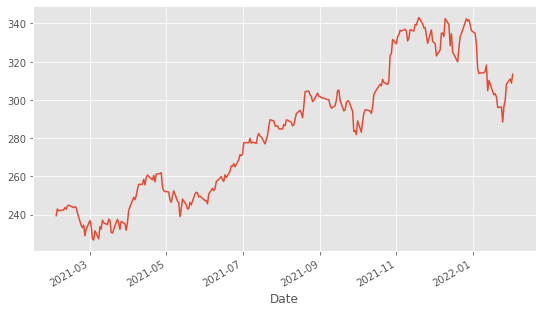

In [97]:
df_msft['Close'].plot()

# 3 Selecting data <a class="anchor" id="3"></a>
**.loc is primarily label based, especially for date as label**  
**.iloc is primarily integer position based**

## 3.1 Selecting a single column <a class="anchor" id="31"></a>
The operations are similar to accessing element out of a dictionary in python.  

### 3.11 Selecting column by column name <a class="anchor" id="311"></a>

In [98]:
df_msft["Close"]

Date
2021-02-02    239.509995
2021-02-03    243.000000
2021-02-04    242.009995
2021-02-05    242.199997
2021-02-08    242.470001
                 ...    
2022-01-27    299.839996
2022-01-28    308.260010
2022-01-31    310.980011
2022-02-01    308.760010
2022-02-02    313.443695
Name: Close, Length: 254, dtype: float64

### 3.12 Selecting a column as an attribute <a class="anchor" id="312"></a>

In [99]:
df_msft.Close

Date
2021-02-02    239.509995
2021-02-03    243.000000
2021-02-04    242.009995
2021-02-05    242.199997
2021-02-08    242.470001
                 ...    
2022-01-27    299.839996
2022-01-28    308.260010
2022-01-31    310.980011
2022-02-01    308.760010
2022-02-02    313.443695
Name: Close, Length: 254, dtype: float64

### 3.13 Selecting a column by position <a class="anchor" id="313"></a>
You can use `iloc` to refer to a specific subset of data. it works similar to the list indexing in python.  
Note: The label index doesn't count as a column, so 0 starts with the first column next to the label index column.  

In [100]:
# I know the index 3 column is Close, so now I wanted to get this column of data
df_msft.iloc[:,3]

Date
2021-02-02    239.509995
2021-02-03    243.000000
2021-02-04    242.009995
2021-02-05    242.199997
2021-02-08    242.470001
                 ...    
2022-01-27    299.839996
2022-01-28    308.260010
2022-01-31    310.980011
2022-02-01    308.760010
2022-02-02    313.443695
Name: Close, Length: 254, dtype: float64

## 3.2 Selecting a row <a class="anchor" id="32"></a>

### 3.2 Selecting a row by date label <a class="anchor" id="321"></a>
Indexing by Date, you have to use .loc

In [101]:
# df_msft["20220127"] will report error
df_msft.loc["20220127"]

Open         3.026600e+02
High         3.073000e+02
Low          2.979300e+02
Close        2.998400e+02
Adj Close    2.998400e+02
Volume       5.348130e+07
Name: 2022-01-27 00:00:00, dtype: float64

### 3.22 Selecting a row by position <a class="anchor" id="322"></a>
Indexing by number, you have to use .iloc

In [102]:
# df_squirrels[11] will report error
df_squirrels.iloc[11]

X                                                                                -73.964
Y                                                                                 40.782
Unique Squirrel ID                                                        22F-PM-1014-06
Hectare                                                                              22F
Shift                                                                                 PM
Date                                                                            10142018
Hectare Squirrel Number                                                                6
Age                                                                                Adult
Primary Fur Color                                                                   Gray
Highlight Fur Color                                                                  NaN
Combination of Primary and Highlight Color                                         Gray+
Color notes          

## 3.3 Selecting multiple rows by slicing range <a class="anchor" id="33"></a>

In [103]:
df_msft[3:7]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-05,242.229996,243.279999,240.419998,242.199997,240.186676,18054800
2021-02-08,243.149994,243.679993,240.809998,242.470001,240.454437,22211900
2021-02-09,241.869995,244.759995,241.380005,243.770004,241.743622,23565000
2021-02-10,245.000000,245.919998,240.889999,242.820007,240.801529,22186700


In [104]:
# reversing the dataframe
df_msft[::-1]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-02,309.630005,315.119995,308.880005,313.443695,313.443695,28314445
2022-02-01,310.410004,310.630005,305.130005,308.760010,308.760010,40950400
2022-01-31,308.950012,312.380005,306.369995,310.980011,310.980011,46444500
2022-01-28,300.230011,308.480011,294.450012,308.260010,308.260010,49743700
2022-01-27,302.660004,307.299988,297.929993,299.839996,299.839996,53481300
...,...,...,...,...,...,...
2021-02-08,243.149994,243.679993,240.809998,242.470001,240.454437,22211900
2021-02-05,242.229996,243.279999,240.419998,242.199997,240.186676,18054800
2021-02-04,242.660004,243.240005,240.369995,242.009995,239.998260,25296100


## 3.4 Selecting multiple rows or columns by label <a class="anchor" id="33"></a>
.loc is primarily for label index, especially datetime

### 3.41 Selecting consecutive rows by label <a class="anchor" id="341"></a>

In [105]:
df_msft.loc["20210203":"20220127"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-03,239.570007,245.089996,239.259995,243.000000,240.980042,27158100
2021-02-04,242.660004,243.240005,240.369995,242.009995,239.998260,25296100
2021-02-05,242.229996,243.279999,240.419998,242.199997,240.186676,18054800
2021-02-08,243.149994,243.679993,240.809998,242.470001,240.454437,22211900
2021-02-09,241.869995,244.759995,241.380005,243.770004,241.743622,23565000
...,...,...,...,...,...,...
2022-01-21,302.690002,304.109985,295.609985,296.029999,296.029999,57984400
2022-01-24,292.200012,297.109985,276.049988,296.369995,296.369995,85731500
2022-01-25,291.519989,294.989990,285.170013,288.489990,288.489990,72848600


### 3.42 Selecting discrete rows by label <a class="anchor" id="342"></a>

In [106]:
df_msft.loc[["20210203","20220127"],:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-03,239.570007,245.089996,239.259995,243.000000,240.980042,27158100
2022-01-27,302.660004,307.299988,297.929993,299.839996,299.839996,53481300


### 3.43 Selecting consecutive columns by label  <a class="anchor" id="343"></a>

In [107]:
df_msft.loc[:,'Open':'Close']

,Open,High,Low,Close
Date,,,,
2021-02-02,241.300003,242.309998,238.690002,239.509995
2021-02-03,239.570007,245.089996,239.259995,243.000000
2021-02-04,242.660004,243.240005,240.369995,242.009995
2021-02-05,242.229996,243.279999,240.419998,242.199997
2021-02-08,243.149994,243.679993,240.809998,242.470001
...,...,...,...,...
2022-01-27,302.660004,307.299988,297.929993,299.839996
2022-01-28,300.230011,308.480011,294.450012,308.260010
2022-01-31,308.950012,312.380005,306.369995,310.980011


### 3.44 Selecting discrete columns by label  <a class="anchor" id="344"></a>
Use str list to multi select columns

In [108]:
df_msft.loc[:,['Close', 'Open']]
# This is same as df_msft[['Close', 'Open']]

,Close,Open
Date,,
2021-02-02,239.509995,241.300003
2021-02-03,243.000000,239.570007
2021-02-04,242.009995,242.660004
2021-02-05,242.199997,242.229996
2021-02-08,242.470001,243.149994
...,...,...
2022-01-27,299.839996,302.660004
2022-01-28,308.260010,300.230011
2022-01-31,310.980011,308.950012


### 3.45 Selecting consecutive columns within a row range <a class="anchor" id="345"></a>

In [109]:
# Now I wanted to get open to close price histroy of Q4 2021
df_msft.loc["20211001":"20211231", "Open":"Close"]

,Open,High,Low,Close
Date,,,,
2021-10-01,282.119995,289.980011,281.290009,289.100006
2021-10-04,287.399994,287.750000,280.250000,283.109985
2021-10-05,284.049988,290.399994,284.049988,288.760010
2021-10-06,285.779999,293.630005,285.510010,293.109985
2021-10-07,295.179993,296.640015,293.920013,294.850006
...,...,...,...,...
2021-12-27,335.459991,342.480011,335.429993,342.450012
2021-12-28,343.149994,343.809998,340.320007,341.250000
2021-12-29,341.299988,344.299988,339.679993,341.950012


### 3.46 Selecting discrete columns within a row range <a class="anchor" id="346"></a>

In [110]:
# Now I wanted to get open and close price histroy of Q4 2021
df_msft.loc["20211001":"20211231", ["Open","Close"]]

,Open,Close
Date,,
2021-10-01,282.119995,289.100006
2021-10-04,287.399994,283.109985
2021-10-05,284.049988,288.760010
2021-10-06,285.779999,293.109985
2021-10-07,295.179993,294.850006
...,...,...
2021-12-27,335.459991,342.450012
2021-12-28,343.149994,341.250000
2021-12-29,341.299988,341.950012


## 3.5 Selecting multiple rows or columns by position <a class="anchor" id="35"></a>

In [111]:
# Selecting multiple consecutive rows and columns
df_squirrels.iloc[1:3,2:7]

,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number
1,21B-AM-1019-04,21B,AM,10192018,4
2,11B-PM-1014-08,11B,PM,10142018,8


In [112]:
# Selecting discrete rows or columns
df_squirrels.iloc[[1,3,6],[2,6,9]]

,Unique Squirrel ID,Hectare Squirrel Number,Highlight Fur Color
1,21B-AM-1019-04,4,NaN
3,32E-PM-1017-14,14,NaN
6,36H-AM-1010-02,2,NaN


# 4 Conditional selection <a class="anchor" id="4"></a>
Conditional filtering acturally decreases number of rows, so the left rows will meet the filtering requirements.

## 4.1 Callable (lambda) selection
Callable must be a function with the dataframe that returns valid output for indexing.  
The lambda variable automatically refers to the leading dataframe.

In [113]:
# Return all rows with close value greater than 300
df_msft.loc[lambda x: x["Close"]>300, :]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-20,299.720001,305.839996,298.059998,304.359985,303.804169,40796100
2021-08-23,303.250000,305.399994,301.850006,304.649994,304.093658,22830200
2021-08-24,305.019989,305.649994,302.000000,302.619995,302.067352,18175800
2021-08-25,304.299988,304.589996,300.420013,302.010010,301.458496,20006100
2021-08-30,301.119995,304.220001,301.059998,303.589996,303.035583,16348100
...,...,...,...,...,...,...
2022-01-20,309.070007,311.649994,301.140015,301.600006,301.600006,35380700
2022-01-28,300.230011,308.480011,294.450012,308.260010,308.260010,49743700
2022-01-31,308.950012,312.380005,306.369995,310.980011,310.980011,46444500


## 4.2 Boolean selection <a class="anchor" id="42"></a>
Boolean selection is common to filter the data, often used to find data matching a certain criteria.  
Logical operators:  
`&`: and  
`\`: or  
`~`: not  


In [114]:
# Use squirrels data
# Showing all rows with morning shift and black or cinnamon color
df_squirrels.loc[(df_squirrels['Shift']=='AM')&
                 ((df_squirrels["Primary Fur Color"]=="Cinnamon")|(df_squirrels["Primary Fur Color"]=="Black")),:]

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
5,-73.968361,40.772591,11H-AM-1010-03,11H,AM,10102018,3,Adult,Cinnamon,White,...,False,False,False,False,True,False,True,False,NaN,POINT (-73.9683613516225 40.7725908847499)
20,-73.964987,40.776493,16I-AM-1008-01,16I,AM,10082018,1,Adult,Cinnamon,"Gray, White",...,False,False,False,False,True,False,True,False,NaN,POINT (-73.9649866016038 40.7764929694457)
21,-73.967063,40.773499,12I-AM-1013-01,12I,AM,10132018,1,Adult,Cinnamon,White,...,False,False,False,False,True,False,False,True,NaN,POINT (-73.9670628558161 40.77349914209411)
45,-73.968064,40.779250,17E-AM-1017-05,17E,AM,10172018,5,Adult,Black,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9680635070949 40.779249873647)
58,-73.974563,40.769260,5E-AM-1008-06,05E,AM,10082018,6,Adult,Cinnamon,White,...,False,False,False,False,False,True,False,False,NaN,POINT (-73.9745630038492 40.7692602628745)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973,-73.957579,40.795993,38D-AM-1017-06,38D,AM,10172018,6,Adult,Black,Cinnamon,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9575791421589 40.7959934459432)
2974,-73.959412,40.791787,33E-AM-1014-01,33E,AM,10142018,1,Adult,Black,Cinnamon,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.959412243507 40.7917871123534)
2975,-73.972408,40.774416,11D-AM-1010-08,11D,AM,10102018,8,Adult,Cinnamon,"Gray, White",...,False,False,False,False,False,True,False,False,NaN,POINT (-73.9724083320538 40.7744163768061)
2997,-73.975208,40.775538,11B-AM-1007-01,11B,AM,10072018,1,Adult,Cinnamon,Gray,...,False,False,False,False,True,True,False,False,NaN,POINT (-73.9752079247419 40.7755376979002)


## 4.3 Quickly finding rows with a target value in a column or a dataframe <a class="anchor" id="43"></a> 
Use boolean filtering.  
For example, I wanted to find the row when Close price is exactly 302.6 dollars

In [115]:
df_msft[abs(df_msft["Close"]-302.6)<=0.02]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-24,305.019989,305.649994,302.0,302.619995,302.067352,18175800


In [116]:
df_msft["Close"][abs(df_msft["Close"]-302.6)<=0.02]

Date
2021-08-24    302.619995
Name: Close, dtype: float64

# 5 Basic statistics <a class="anchor" id="5">
There exists a large number of methods for computing descriptive statistics and other related operations on Series, DataFrame. Most of these are aggregations (hence producing a lower-dimensional result) like `sum()`, `mean()`, and `quantile()`, but some of them, like `cumsum()` and `cumprod()`, produce an object of the same size. Generally speaking, these methods take an axis argument, just like ndarray.{sum, std, …}, but the axis can be specified by name or integer:

Series: no axis argument needed

DataFrame: “index” (axis=0, default), “columns” (axis=1)

## 5.1 mean, sum, std <a class="anchor" id="51">
.mean or .mean(0) returns the average value of all dates or indexes. This shows you the average of each column.   
.mean(1) returns the the average on each day or index.   
**series.mean() returns a floating value.**  
**dataframe.mean() returns a pandas series.**  
by default, option `skipna=True`to exclude missing data `NaN`

In [117]:
df_msft.mean()
# df_msft.mean(0) same as df_msft.mean(0)

Open         2.828843e+02
High         2.852994e+02
Low          2.803319e+02
Close        2.829801e+02
Adj Close    2.821384e+02
Volume       2.712770e+07
dtype: float64

In [118]:
df_msft["Close"].mean()

282.9800538818898

In [119]:
df_msft.mean(1)

Date
2021-02-02    4.319583e+06
2021-02-03    4.526551e+06
2021-02-04    4.216218e+06
2021-02-05    3.009335e+06
2021-02-08    3.702185e+06
                  ...     
2022-01-27    8.913801e+06
2022-01-28    8.290870e+06
2022-01-31    7.741008e+06
2022-02-01    6.825324e+06
2022-02-02    4.719334e+06
Length: 254, dtype: float64

In [120]:
df_msft["Close"].sum()

71876.933686

In [121]:
df_msft["Close"].std()

34.353195148174784

## 5.2 summarizing data: describe <a class="anchor" id="52">
computes a variety of summary statistics about a Series or the columns of a DataFrame (excluding NAs of course):

In [122]:
df_msft.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,282.884331,285.299449,280.331890,282.980054,282.138424,2.712770e+07
std,34.512348,34.746382,33.933446,34.353195,34.848483,1.039858e+07
min,226.740005,232.470001,224.259995,226.729996,225.363129,1.390020e+07
25%,250.977501,251.817498,249.062500,250.782498,249.846222,2.023362e+07
50%,286.229995,288.640000,283.784988,286.470001,285.400497,2.477650e+07
75%,308.260002,310.422501,303.937500,307.950005,307.387650,3.068140e+07
max,344.619995,349.670013,342.200012,343.109985,343.109985,9.042890e+07


## 5.3 min/max <a class="anchor" id="53">
series.min() returns minimum value in a series/column, float  
dataframe.min() returns minimum value by column, pandas series  
series.idxmin() returns minimum value in a series/column, label type
dataframe.idxmin() returns minimum value by column, pandas series

In [123]:
df_msft["Close"].min()

226.729996

In [124]:
df_msft.min()

Open         2.267400e+02
High         2.324700e+02
Low          2.242600e+02
Close        2.267300e+02
Adj Close    2.253631e+02
Volume       1.390020e+07
dtype: float64

In [125]:
df_msft["Close"].idxmin()

Timestamp('2021-03-04 00:00:00')

In [126]:
df_msft.idxmin()

Open        2021-03-04
High        2021-03-19
Low         2021-03-04
Close       2021-03-04
Adj Close   2021-03-04
Volume      2021-08-05
dtype: datetime64[ns]

## 5.4 count and value count <a class="anchor" id="54">
series.count() returns non-NA observations, float  
dataframe.count() returns non-NA observations by column, pandas series  
only series has value_counts(), dataframe doesn't have value count  
value_counts() returns histogram of 1D array of values. 

In [127]:
df_squirrels.count()

X                                             3023
Y                                             3023
Unique Squirrel ID                            3023
Hectare                                       3023
Shift                                         3023
Date                                          3023
Hectare Squirrel Number                       3023
Age                                           2902
Primary Fur Color                             2968
Highlight Fur Color                           1937
Combination of Primary and Highlight Color    3023
Color notes                                    182
Location                                      2959
Above Ground Sighter Measurement              2909
Specific Location                              476
Running                                       3023
Chasing                                       3023
Climbing                                      3023
Eating                                        3023
Foraging                       

### 5.41 Finding the most/least appearance of a value in a column <a class="anchor" id="541"></a>
Among the wealth of data, we can use `.value_counts()` to quickly find the most or least appearance of a value in a column.   
Still use squirrel data, now I wanted to know the most common and most uncommon color type of squirrels.  
Note: the type of output of `.value_counts()` is a pandas series: `pandas.core.series.Series`

In [128]:
df_squirrels["Primary Fur Color"].value_counts()

Gray        2473
Cinnamon     392
Black        103
Name: Primary Fur Color, dtype: int64

**Visualize it by plotting**

<AxesSubplot:>

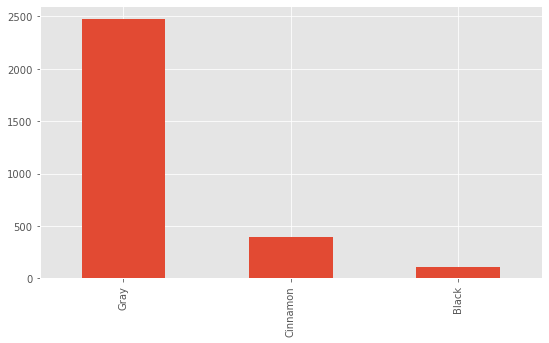

In [129]:
colors.plot(kind='bar')

# Working with Numpy
material from 10 minutes to Pandas, DataFrame.to_numpy() 

## Turn pandas column to numpy series
Each column in a DataFrame is a Series. As a single column is selected, the returned object is a pandas Series. 